In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X, y = load_digits(return_X_y=True)

In [2]:
models = {
    'Underfitting\n(DecisionTree depth=1)': DecisionTreeClassifier(
        max_depth=1, random_state=42
    ),
    'Bon modele\n(RandomForest n=100)': RandomForestClassifier(
        n_estimators=100, random_state=42
    ),
    'Overfitting\n(DecisionTree depth=None)': DecisionTreeClassifier(
        max_depth=None, random_state=42
    )
}


In [3]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes_range = np.linspace(0.1, 1.0, 10)

learning_data = {}
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=cv,
        train_sizes=train_sizes_range,
        scoring='accuracy',
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    learning_data[name] = {
        'train_sizes': train_sizes,
        'train_mean': train_scores.mean(axis=1),
        'train_std': train_scores.std(axis=1),
        'test_mean': test_scores.mean(axis=1),
        'test_std': test_scores.std(axis=1),
    }

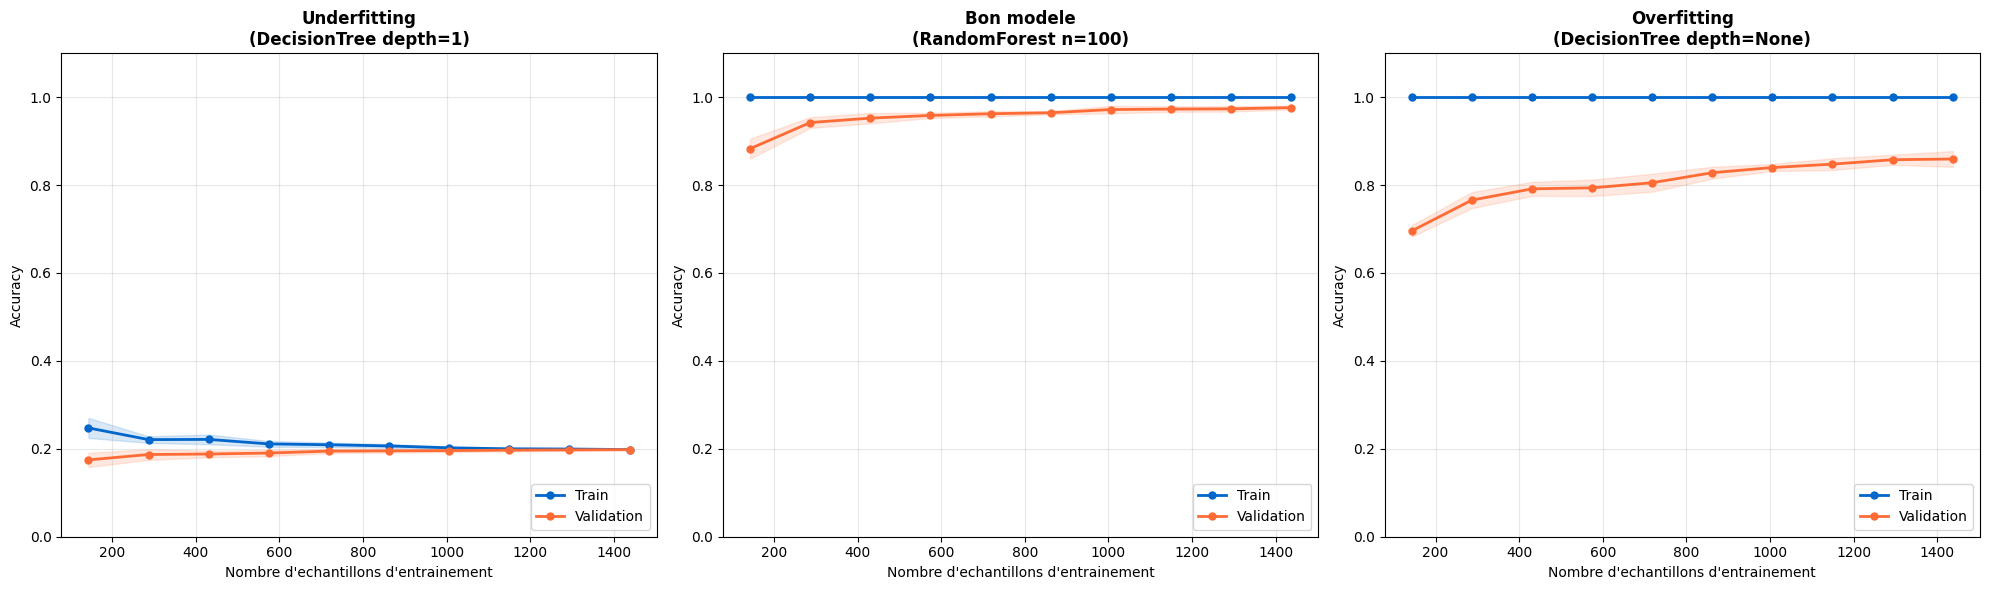

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
colors = {
    'train': '#0066cc',
    'test': '#ff6b35'
}

for ax, (name, data) in zip(axes, learning_data.items()):
    ax.plot(data['train_sizes'], data['train_mean'], 'o-',
            color=colors['train'], linewidth=2, markersize=5, label='Train')
    ax.plot(data['train_sizes'], data['test_mean'], 'o-',
            color=colors['test'], linewidth=2, markersize=5, label='Validation')


    ax.fill_between(data['train_sizes'],
                     data['train_mean'] - data['train_std'],
                     data['train_mean'] + data['train_std'],
                     alpha=0.15, color=colors['train'])
    ax.fill_between(data['train_sizes'],
                     data['test_mean'] - data['test_std'],
                     data['test_mean'] + data['test_std'],
                     alpha=0.15, color=colors['test'])

    final_train = data['train_mean'][-1]
    final_test = data['test_mean'][-1]
    gap = final_train - final_test

    ax.set_title(name, fontsize=12, fontweight='bold')
    ax.set_xlabel('Nombre d\'echantillons d\'entrainement')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_ylim(0, 1.1)
    ax.grid(True, alpha=0.3)

    if gap > 0.1:
        diag = f'GAP = {gap:.3f}\nOVERFITTING'
        diag_color = '#ef4444'
    elif final_test < 0.7:
        diag = f'Score = {final_test:.3f}\nUNDERFITTING'
        diag_color = '#f59e0b'
    else:
        diag = f'GAP = {gap:.3f}\nBON MODELE'
        diag_color = '#22c55e'

plt.tight_layout()
plt.show()
